In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load dataset

In [2]:
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\REMOTE APPRENTICESHIP AMDARI\PERSONAL PROJECT\Stock Market Capstone\Dataset\stock_prices_with_indicators.csv")
company_df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\REMOTE APPRENTICESHIP AMDARI\PERSONAL PROJECT\Stock Market Capstone\Dataset\company_info.csv")
prices_df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\REMOTE APPRENTICESHIP AMDARI\PERSONAL PROJECT\Stock Market Capstone\Dataset\stock_prices.csv")
indices_df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\REMOTE APPRENTICESHIP AMDARI\PERSONAL PROJECT\Stock Market Capstone\Dataset\market_indices.csv")

### merge sector and ticker to indicators and convert date to datetime

In [3]:
df = df.merge(company_df[['ticker','sector']], on='ticker', how='left')
df['date'] = pd.to_datetime(df['date'])

df.head(3)

,ticker,date,open,high,low,close,volume,adjusted_close,sma_20,sma_50,...,atr_14,volume_sma_20,volume_ratio,momentum_10,momentum_20,price_to_sma_50,volatility_20,future_return_5d,trend_label,sector
0,STK001,2021-01-04,158.09,160.97,158.09,160.11,962644.0,160.11,160.110000,160.110000,...,2.880,962644.0,1.000000,NaN,NaN,0.000000,NaN,0.026357,Uptrend,Technology
1,STK001,2021-01-05,163.16,165.50,160.76,162.36,1312685.0,162.36,161.235000,161.235000,...,4.135,1137664.5,1.153842,NaN,NaN,0.006977,NaN,0.018169,Sideways,Technology
2,STK001,2021-01-06,161.89,162.51,160.94,161.78,1449177.0,161.78,161.416667,161.416667,...,3.280,1241502.0,1.167277,NaN,NaN,0.002251,0.012463,-0.012301,Sideways,Technology


### Checking shapes, info, and describe

In [4]:
print("Dataset Shape", df.shape)

Dataset Shape (15502, 32)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15502 entries, 0 to 15501
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ticker            15502 non-null  object        
 1   date              15502 non-null  datetime64[ns]
 2   open              15502 non-null  float64       
 3   high              15502 non-null  float64       
 4   low               15502 non-null  float64       
 5   close             15502 non-null  float64       
 6   volume            15502 non-null  float64       
 7   adjusted_close    15502 non-null  float64       
 8   sma_20            15192 non-null  float64       
 9   sma_50            15502 non-null  float64       
 10  sma_200           15502 non-null  float64       
 11  ema_12            15502 non-null  float64       
 12  ema_26            15502 non-null  float64       
 13  macd              15191 non-null  float64       
 14  macd_signal       1550

In [6]:
df.describe()

,date,open,high,low,close,volume,adjusted_close,sma_20,sma_50,sma_200,...,bb_width,true_range,atr_14,volume_sma_20,volume_ratio,momentum_10,momentum_20,price_to_sma_50,volatility_20,future_return_5d
count,15502,15502.000000,15502.000000,15502.000000,15502.000000,1.550200e+04,15502.000000,15192.000000,15502.000000,15502.000000,...,15171.000000,15502.000000,15502.000000,1.550200e+04,15192.000000,15302.000000,15102.000000,15502.000000,15462.000000,15502.000000
mean,2022-06-29 01:41:03.940136960,102.408860,104.210076,100.685710,102.447796,1.255806e+06,102.447796,102.145547,101.370939,99.078231,...,16.282274,3.731157,3.718369,1.245795e+06,1.000063,0.005172,0.010515,0.007683,0.022965,0.002466
min,2021-01-04 00:00:00,21.060000,22.080000,21.060000,21.440000,8.018930e+05,21.440000,22.808000,23.391200,25.758150,...,0.113137,0.270000,0.650000,8.854700e+05,0.608932,-0.283947,-0.417187,-0.376681,0.001749,-0.635318
25%,2021-09-30 00:00:00,63.350000,64.432500,62.235000,63.332500,1.069136e+06,63.332500,63.007500,64.068350,66.673452,...,7.937950,1.870000,2.158571,1.207038e+06,0.864243,-0.042132,-0.058712,-0.050586,0.017978,-0.030752
50%,2022-06-29 00:00:00,88.540000,90.090000,87.155000,88.650000,1.249854e+06,88.650000,88.149250,87.822600,86.859500,...,12.344552,2.970000,3.128929,1.243692e+06,1.001132,0.004793,0.009213,0.007012,0.021983,0.002061
75%,2023-03-28 00:00:00,131.052500,132.977500,128.850000,130.967500,1.420747e+06,130.967500,130.658125,130.193450,127.921712,...,19.921944,4.620000,4.653571,1.282458e+06,1.131701,0.051565,0.078204,0.068663,0.026906,0.035708
max,2023-12-25 00:00:00,512.090000,516.020000,497.210000,509.110000,1.399696e+07,509.110000,489.384000,470.320200,383.890800,...,124.994567,39.530000,19.738571,1.578011e+06,1.574700,0.370482,0.669193,0.427233,0.065473,0.245885
std,NaN,58.524307,59.610521,57.519995,58.583470,3.880426e+05,58.583470,57.549051,55.626918,49.001519,...,13.645730,2.904011,2.330653,5.659106e+04,0.167556,0.075902,0.108675,0.096457,0.007044,0.053491


### Correcting datatype and removing spaces

In [7]:
df['volume'] = df['volume'].astype(int)

In [8]:
df.columns = df.columns.str.strip()

### Checking for duplicates

In [9]:
df.duplicated().value_counts()

False    15502
Name: count, dtype: int64

In [10]:
df.duplicated().mean()*100

np.float64(0.0)

### Checking missing number

In [11]:
df.isnull().mean()*100

ticker              0.000000
date                0.000000
open                0.000000
high                0.000000
low                 0.000000
close               0.000000
volume              0.000000
adjusted_close      0.000000
sma_20              1.999742
sma_50              0.000000
sma_200             0.000000
ema_12              0.000000
ema_26              0.000000
macd                2.006193
macd_signal         0.000000
macd_histogram      0.000000
rsi_14              2.128758
bb_middle           0.000000
bb_upper            0.129016
bb_lower            0.129016
bb_width            2.135208
true_range          0.000000
atr_14              0.000000
volume_sma_20       0.000000
volume_ratio        1.999742
momentum_10         1.290156
momentum_20         2.580312
price_to_sma_50     0.000000
volatility_20       0.258031
future_return_5d    0.000000
trend_label         0.000000
sector              0.000000
dtype: float64

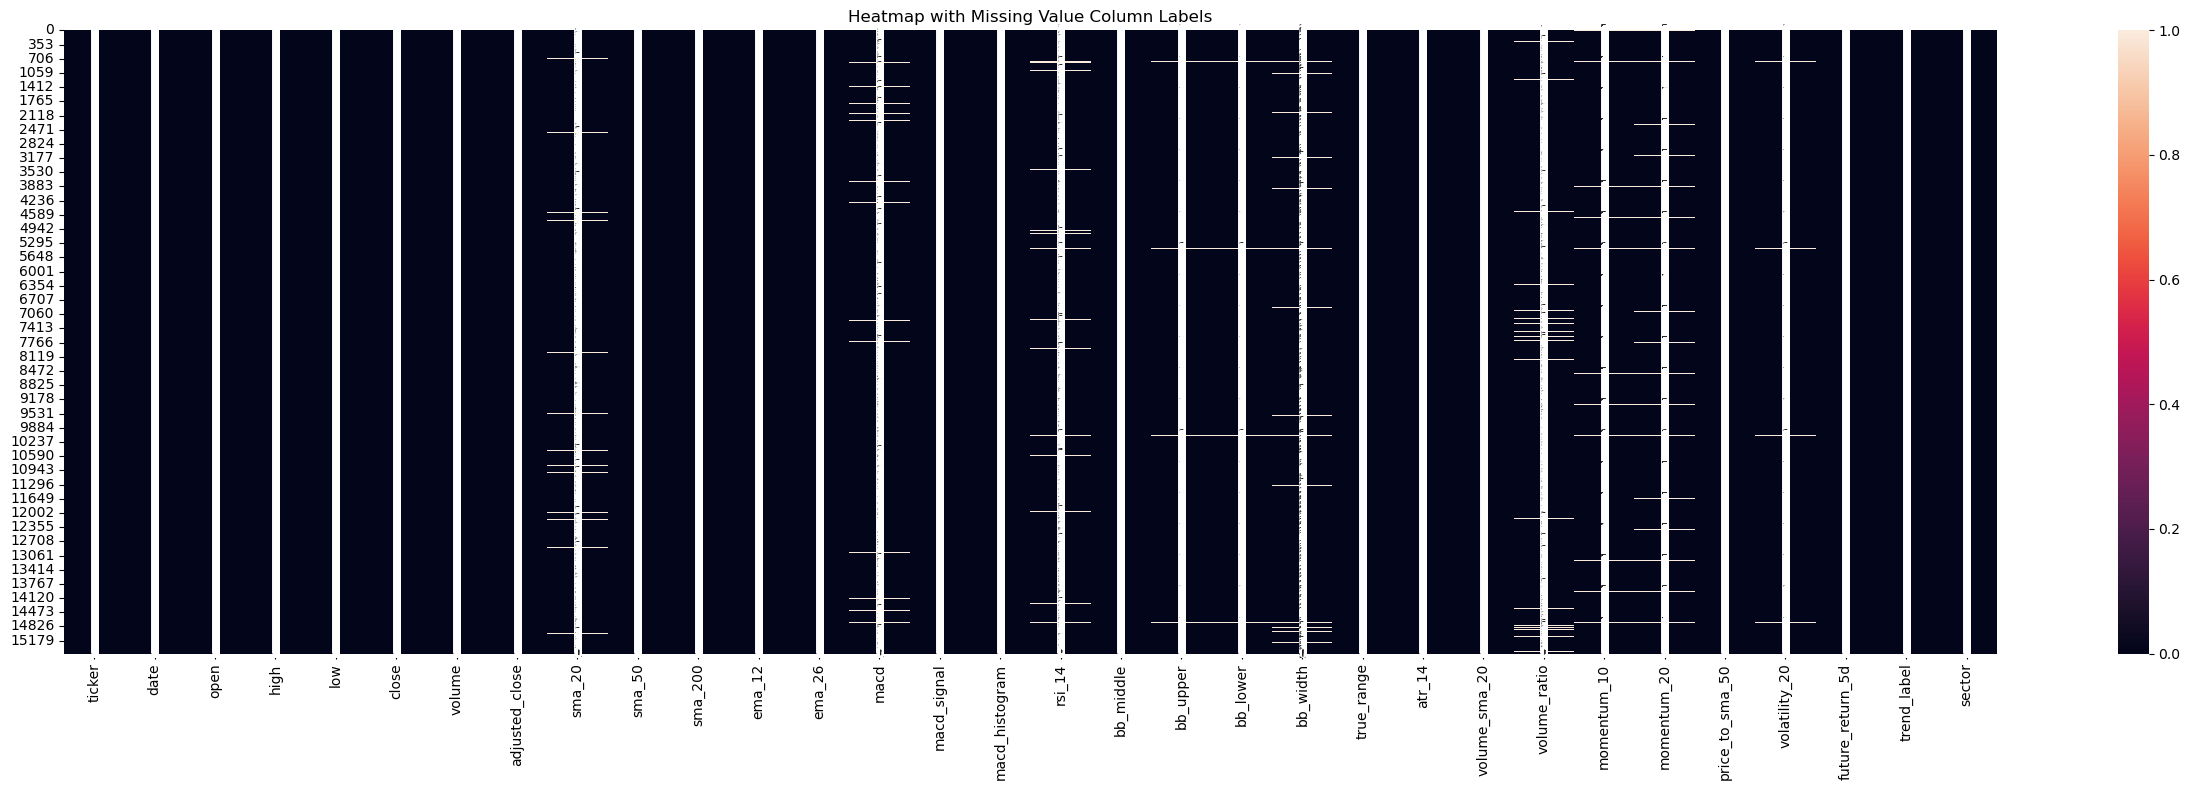

In [12]:
plt.figure(figsize=(25,8))
sns.heatmap(df.isnull(), annot=True)
plt.title("Heatmap with Missing Value Column Labels")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [13]:
import missingno as msno  # Missing data - Data visualisation

<Axes: >

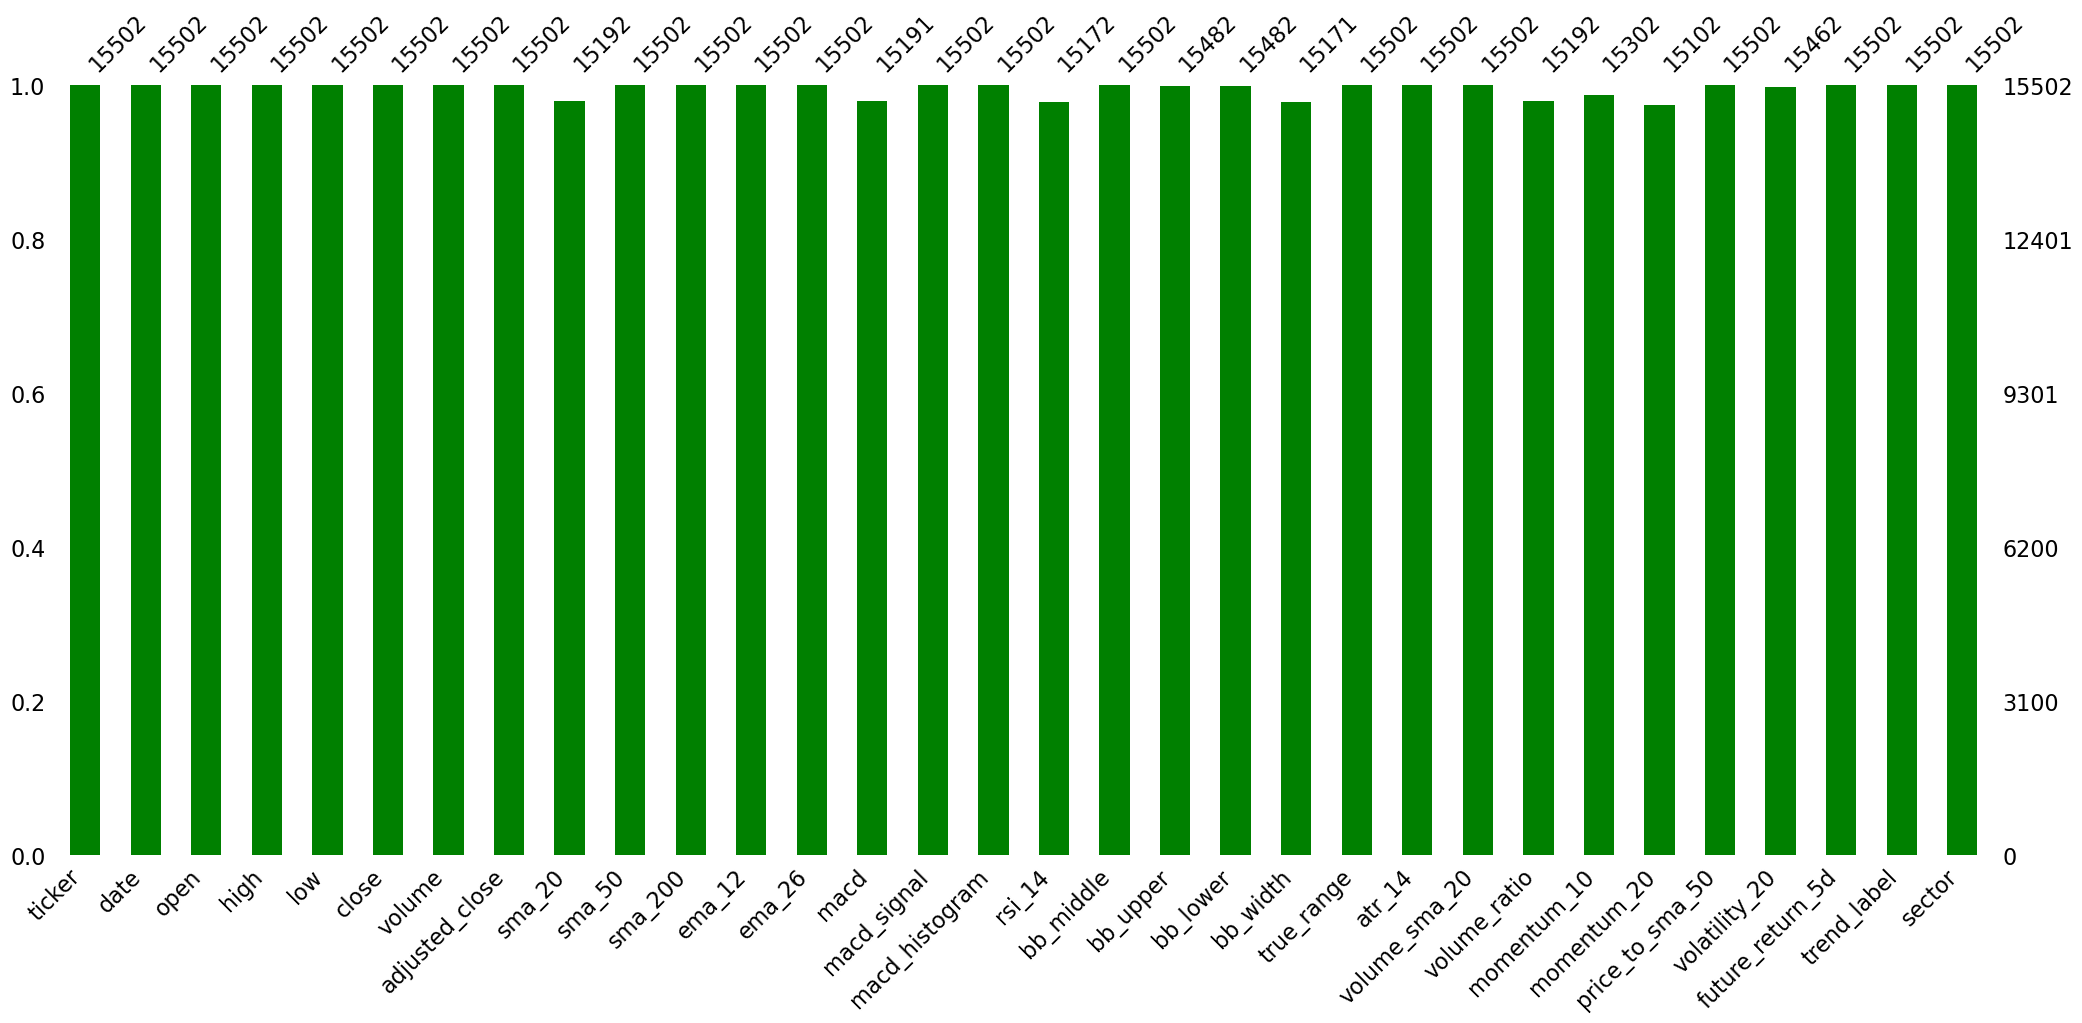

In [14]:
msno.bar(df, color="green")

### Handling missing number

In [15]:
df = df.fillna(method="bfill")

C:\Users\Admin\AppData\Local\Temp\ipykernel_19620\2154904616.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="bfill")


In [ ]:
df = df.fillna(method="bfill")

In [18]:
print("Remaining NaNs:", df.isna().sum().sum())

Remaining NaNs: 0


### Handling outliers

In [19]:
numerica_cols = df.select_dtypes(include=["number"]).columns
print(numerica_cols)

Index(['open', 'high', 'low', 'close', 'volume', 'adjusted_close', 'sma_20',
       'sma_50', 'sma_200', 'ema_12', 'ema_26', 'macd', 'macd_signal',
       'macd_histogram', 'rsi_14', 'bb_middle', 'bb_upper', 'bb_lower',
       'bb_width', 'true_range', 'atr_14', 'volume_sma_20', 'volume_ratio',
       'momentum_10', 'momentum_20', 'price_to_sma_50', 'volatility_20',
       'future_return_5d'],
      dtype='object')


In [20]:
numerica_cols.value_counts().sum()

np.int64(28)

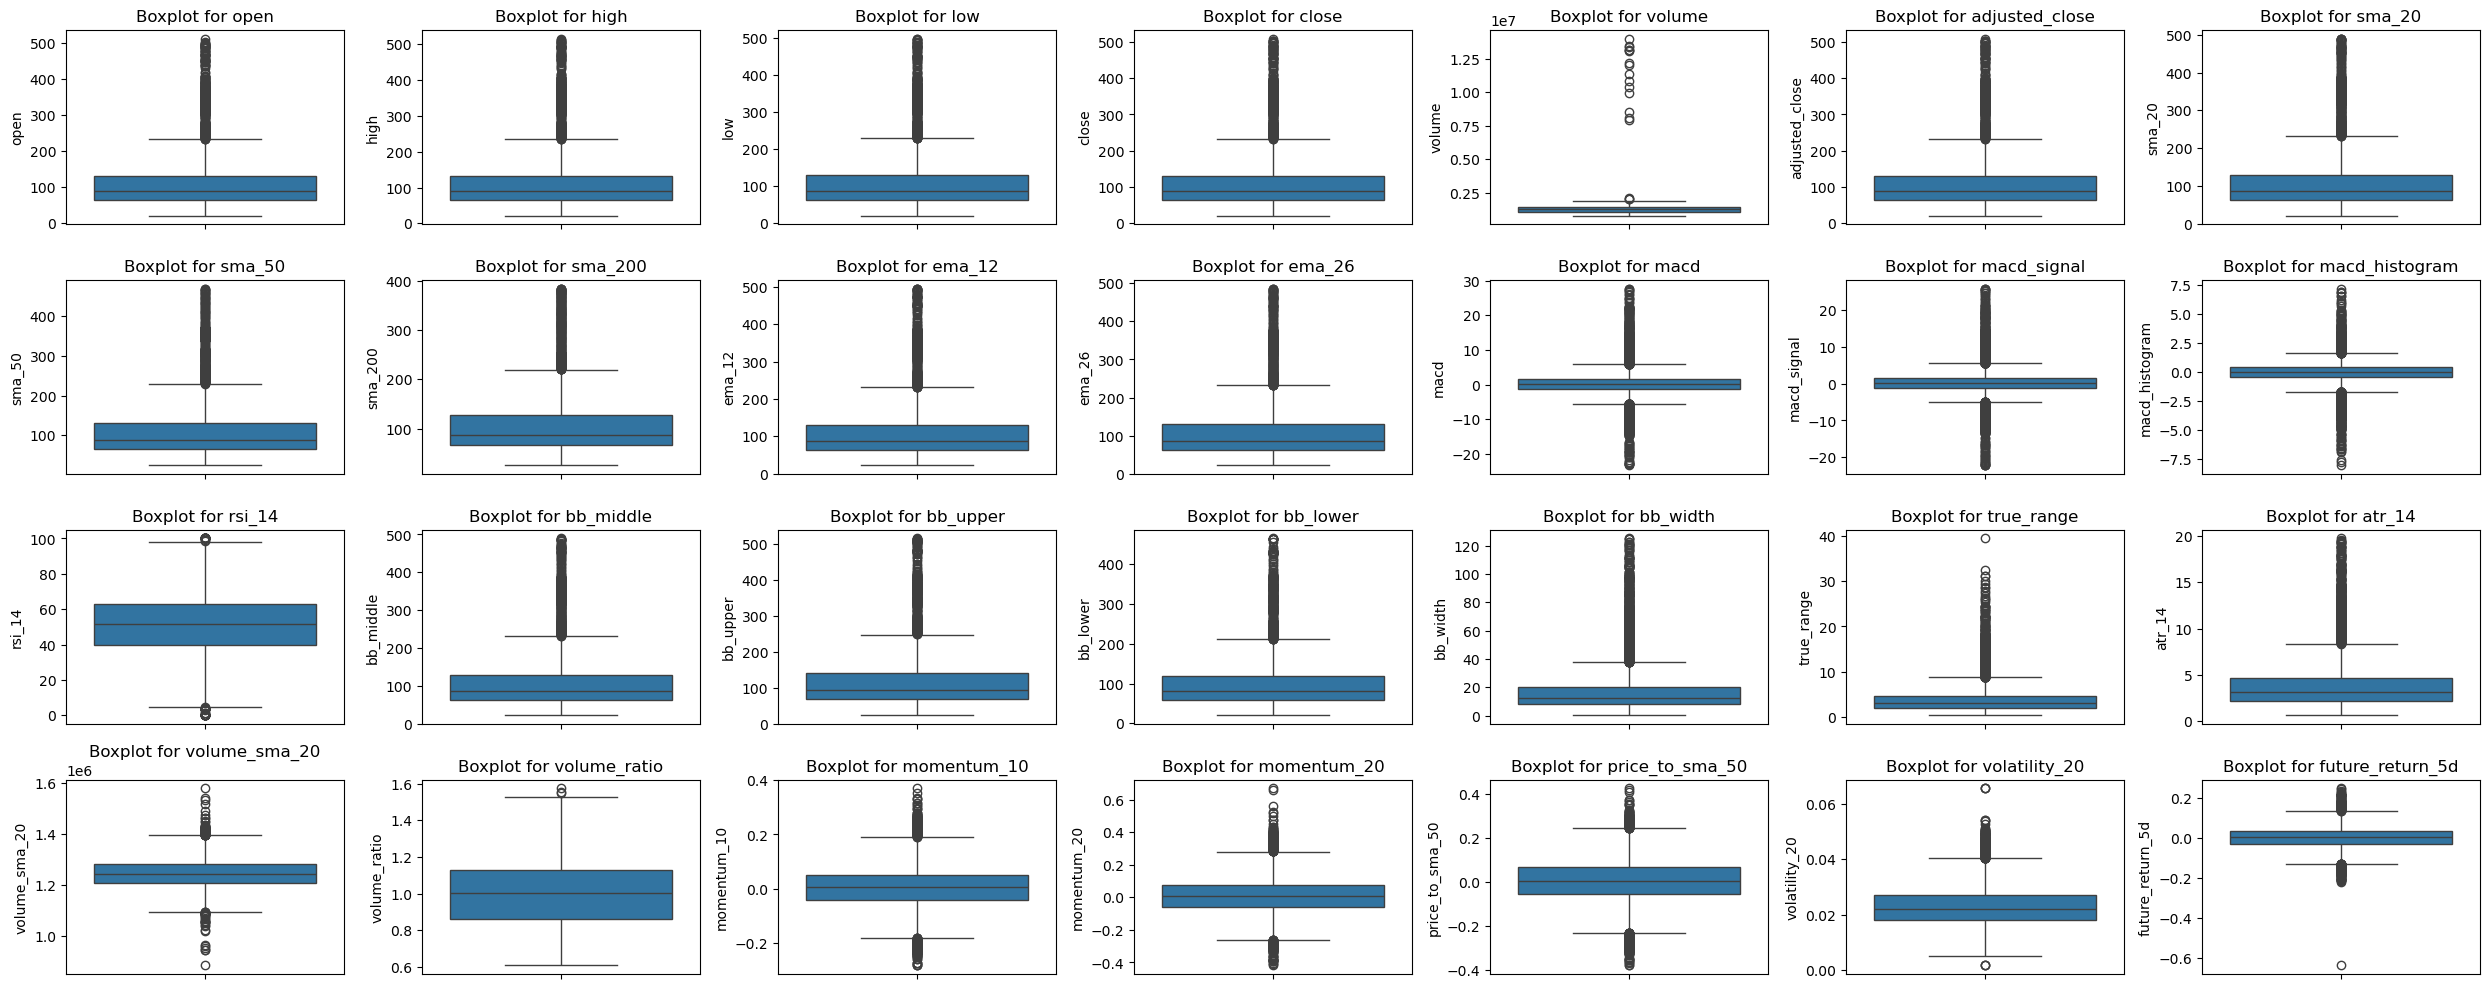

In [21]:
# Boxplot to confirm outliers
fig, ax = plt.subplots(nrows=4, ncols=7, figsize=(25,10))
ax=ax.flatten()

for idx, col in enumerate(numerica_cols):
    sns.boxplot(df[col], ax=ax[idx])
    ax[idx].set_title(f"Boxplot for {col}")

plt.tight_layout()
plt.show()

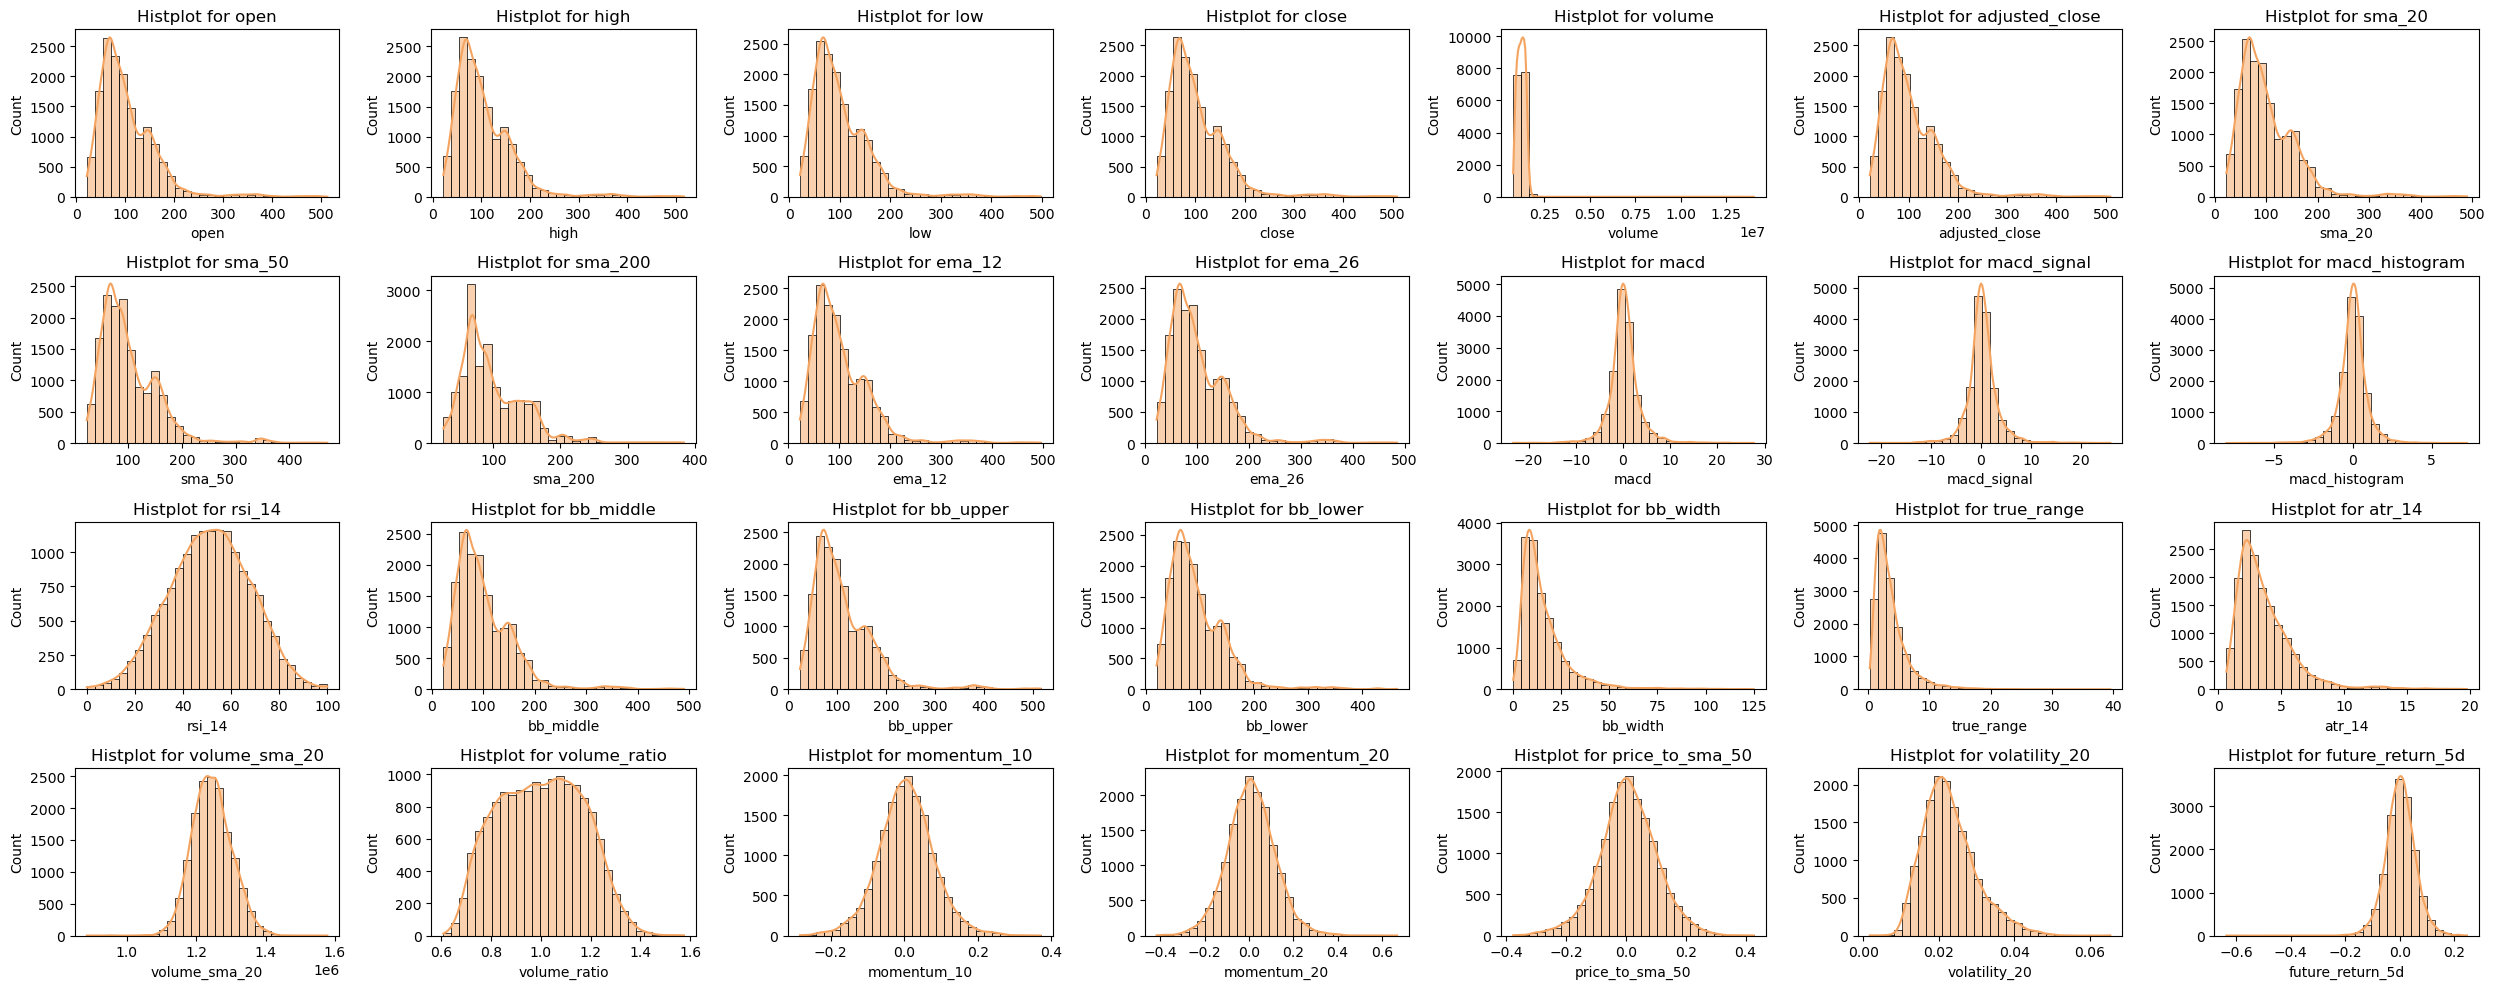

In [23]:
# To visualise numerica cols distributions

fig, ax = plt.subplots(nrows=4, ncols=7, figsize=(25,10))
ax=ax.flatten()
for idx, col in enumerate(numerica_cols):
    sns.histplot(df[col], ax=ax[idx], kde=True, bins=30, color="sandybrown")
    ax[idx].set_title(f"Histplot for {col}")

plt.tight_layout()
plt.show()

In [24]:
df_raw = df.copy()  # keep original data

In [25]:
for col in numerica_cols:
        df[col] = df[col].clip(lower=df[col].quantile(0.01), upper=df[col].quantile(0.95))

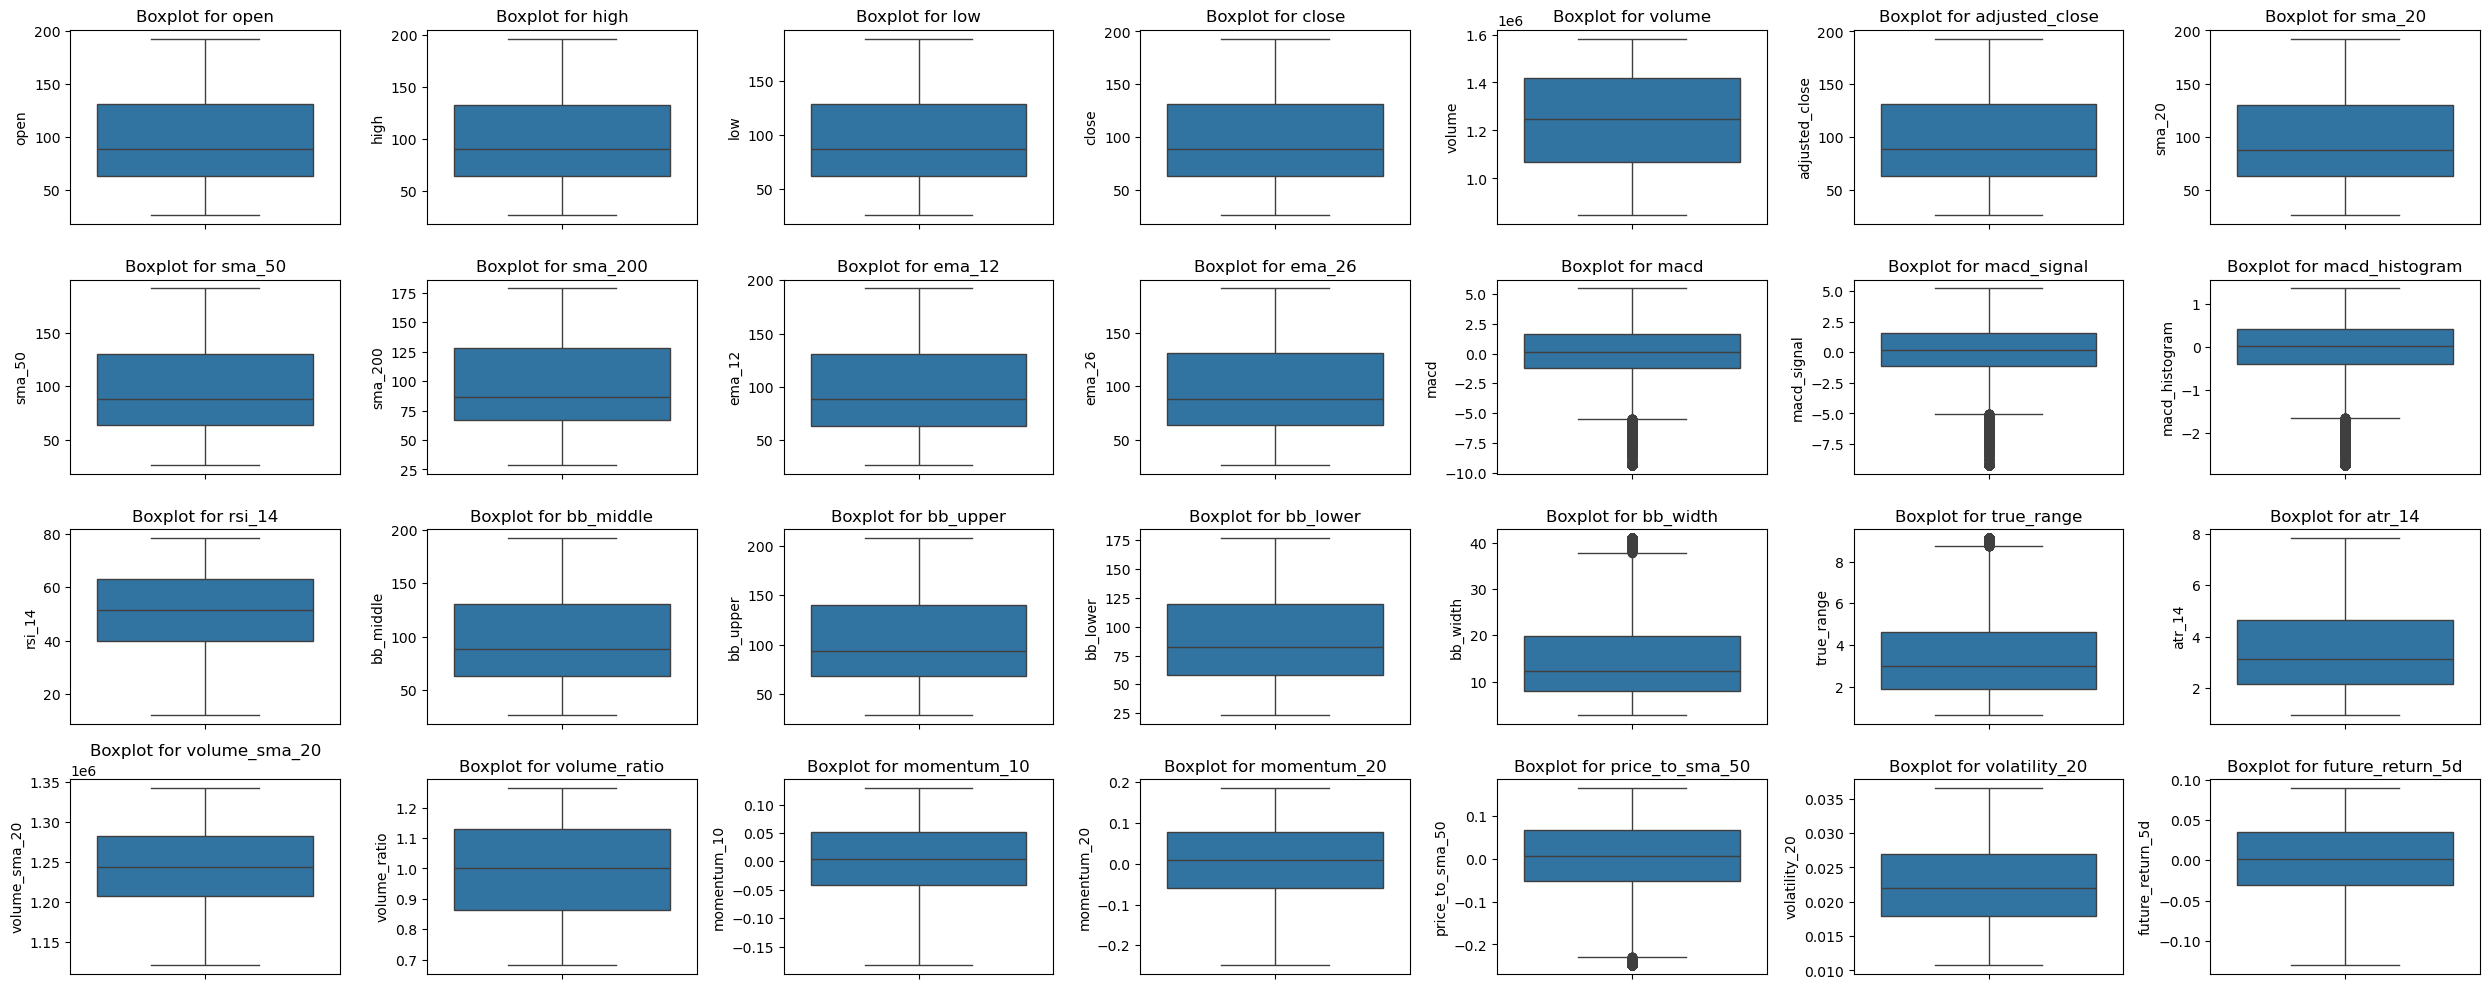

In [26]:
# Boxplot to further confirm outliers
fig, ax = plt.subplots(nrows=4, ncols=7, figsize=(25,10))
ax=ax.flatten()

for idx, col in enumerate(numerica_cols):
    sns.boxplot(df[col], ax=ax[idx])
    ax[idx].set_title(f"Boxplot for {col}")

plt.tight_layout()
plt.show()

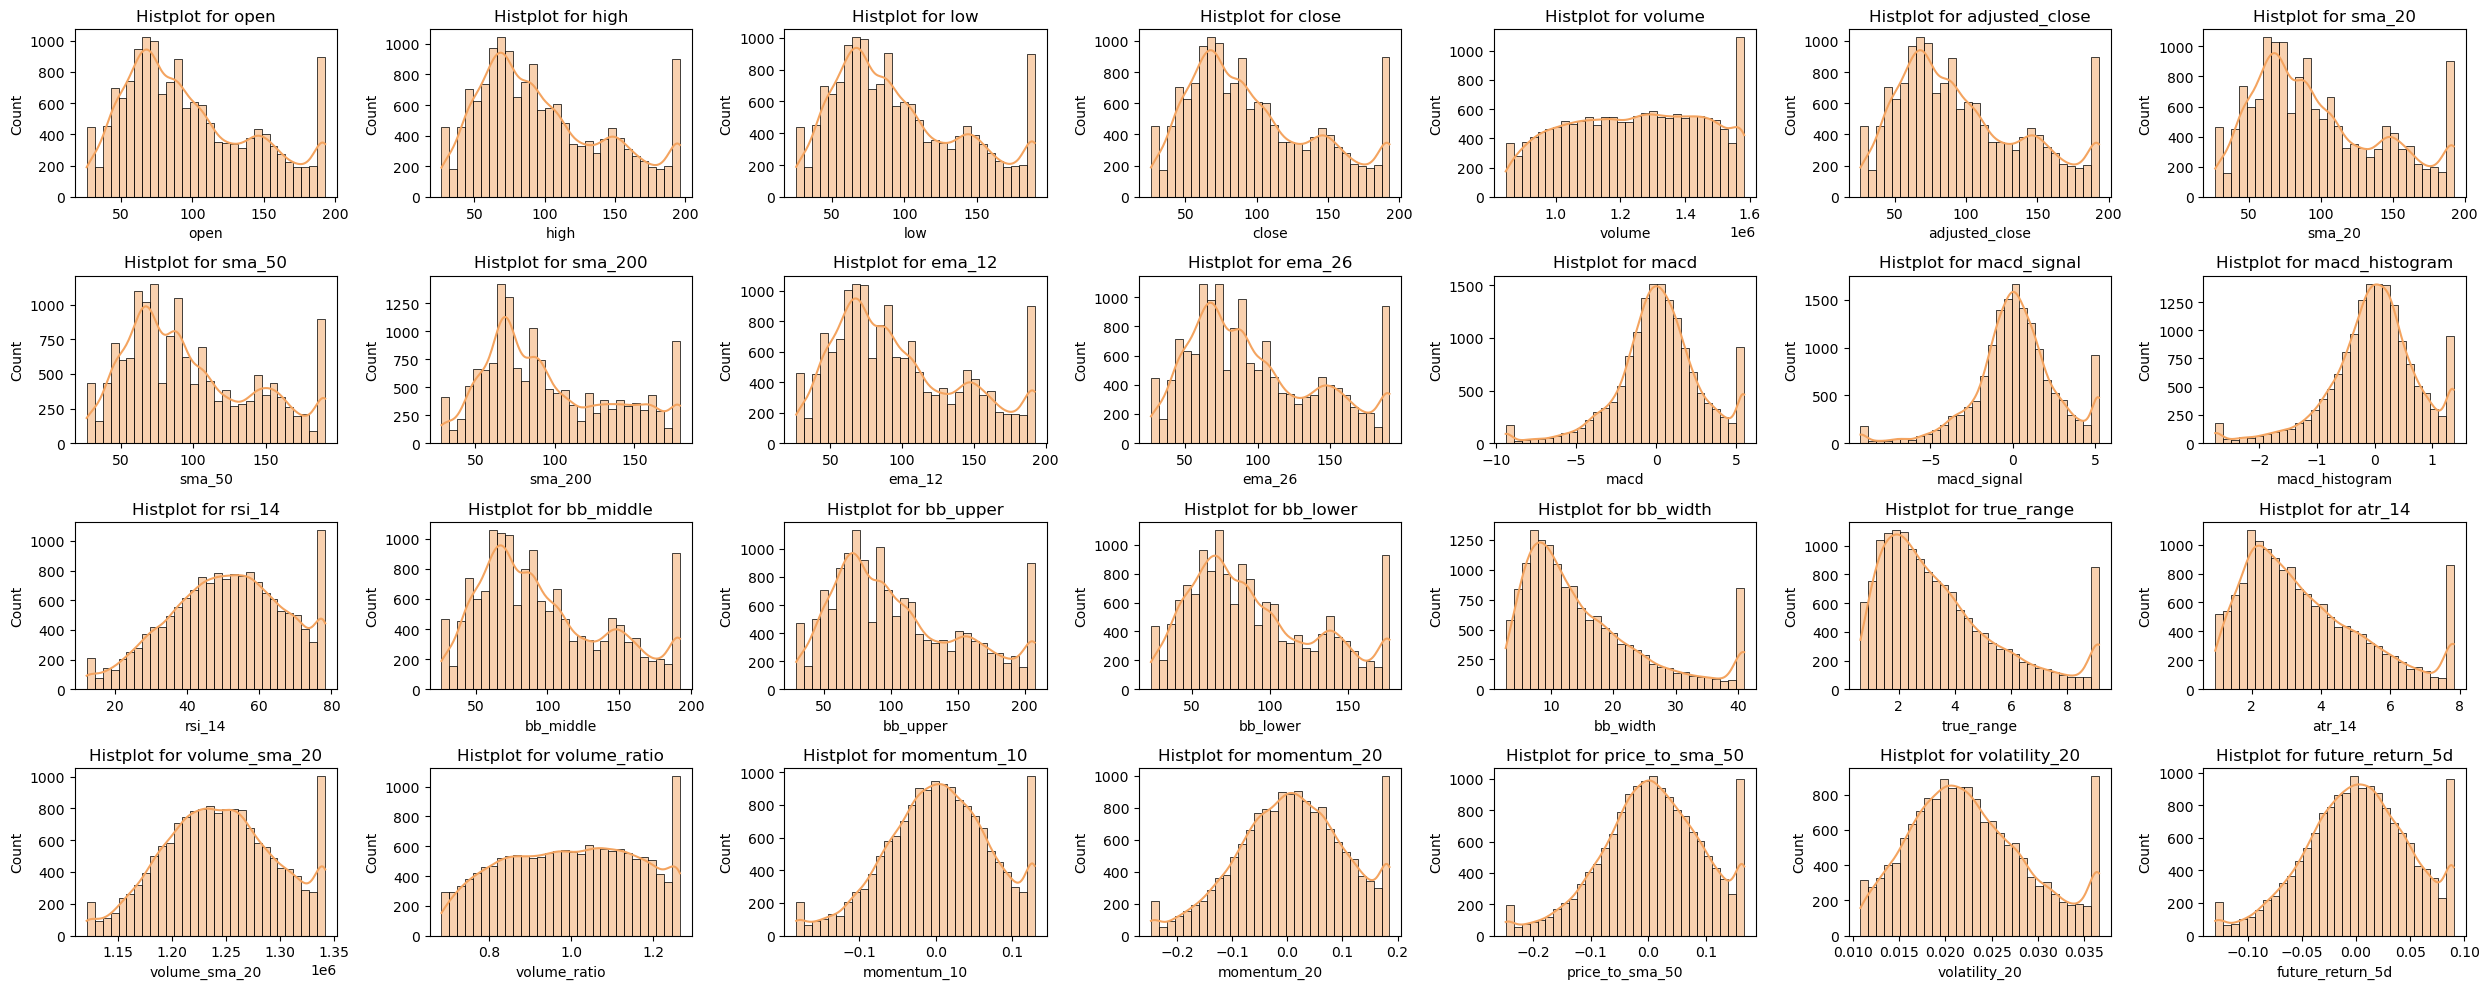

In [27]:
# To visualise cleaned numerica cols distributions

fig, ax = plt.subplots(nrows=4, ncols=7, figsize=(25,10))
ax=ax.flatten()
for idx, col in enumerate(numerica_cols):
    sns.histplot(df[col], ax=ax[idx], kde=True, bins=30, color="sandybrown")
    ax[idx].set_title(f"Histplot for {col}")

plt.tight_layout()
plt.show()

### Save cleaned data

In [28]:
df_clean = df.copy()

In [29]:
df_clean.to_csv('clean_clipped_data.csv', index=False)

### Data Quality

In [30]:
# Calculate min, max, and coverage
date_coverage = (
    df.groupby('ticker')['date']
      .agg(Start_Date='min', End_Date='max')
      .assign(Coverage_Days=lambda x: (x['End_Date'] - x['Start_Date']).dt.days)
      .reset_index()
)

print(date_coverage)

    ticker Start_Date   End_Date  Coverage_Days
0   STK001 2021-01-04 2023-12-22           1082
1   STK002 2021-01-04 2023-12-22           1082
2   STK003 2021-01-04 2023-12-22           1082
3   STK004 2021-01-04 2023-12-22           1082
4   STK005 2021-01-04 2023-12-22           1082
5   STK006 2021-01-04 2023-12-22           1082
6   STK007 2021-01-04 2023-12-22           1082
7   STK008 2021-01-04 2023-12-22           1082
8   STK009 2021-01-04 2023-12-22           1082
9   STK010 2021-01-04 2023-12-22           1082
10  STK011 2021-01-04 2023-12-22           1082
11  STK012 2021-01-04 2023-12-25           1085
12  STK013 2021-01-04 2023-12-22           1082
13  STK014 2021-01-04 2023-12-25           1085
14  STK015 2021-01-04 2023-12-22           1082
15  STK016 2021-01-04 2023-12-22           1082
16  STK017 2021-01-04 2023-12-22           1082
17  STK018 2021-01-04 2023-12-22           1082
18  STK019 2021-01-04 2023-12-22           1082
19  STK020 2021-01-04 2023-12-22        

In [31]:
Missing_value_percentage = pd.DataFrame(
    [{'sma_20': 1.999742, 'macd': 2.006193, 'rsi_14': 2.128758, 
      'bb_upper': 0.129016, 'bb_lower': 0.129016, 
      'bb_width': 2.135208, 'volume_ratio': 1.999742, 
      'momentum_10': 1.290156, 'momentum_20': 2.580312,'volatility_20': 0.258031}]
)

Missing_value_percentage = Missing_value_percentage.T
Missing_value_percentage.columns = ['Missing (%)']
print(Missing_value_percentage)

               Missing (%)
sma_20            1.999742
macd              2.006193
rsi_14            2.128758
bb_upper          0.129016
bb_lower          0.129016
bb_width          2.135208
volume_ratio      1.999742
momentum_10       1.290156
momentum_20       2.580312
volatility_20     0.258031


## Data type corrections

**1.** **rsi_14** has **space** and was strip
 
**2.** **volume** was in **float** and was corrected to **int. dtype**

## Duplicate records count

**0% duplicates** recorded

## Misssing values

**10 columns** recorded with a missing values are  stock_price_indicators dataset and result are visualised above. This was handled using forward fill and backward fill for NaNs but no NaNs recorded. 

## Date range coverage per stock
1082 days is the covered range per each stock from **2021-01-04**  to **2023-12-22** 

## Handling Outliers
Outlier were detected in the dataset and was capped using 5 and 95 percentile